In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# ignore warnings
warnings.filterwarnings("ignore")

In [4]:
# read csv (comma separated value) into data
data = pd.read_csv('column_2C_weka.csv')
print(plt.style.available) # look at available plot styles
plt.style.use('ggplot')


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# EXPLORATORY DATA ANALYSIS (EDA)  数据分析

In [5]:
data.head()  # 查看前几行的数据

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [6]:
data.info()  # 查看数据信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [7]:
data.describe()  # 对数字大致认识，是否有边界值等等

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


pd.plotting.scatter_matrix:

- green: normal and red: abnormal
- c: color
- figsize: figure size
- diagonal: histohram of each features
- alpha: opacity
- s: size of marker
- marker: marker type

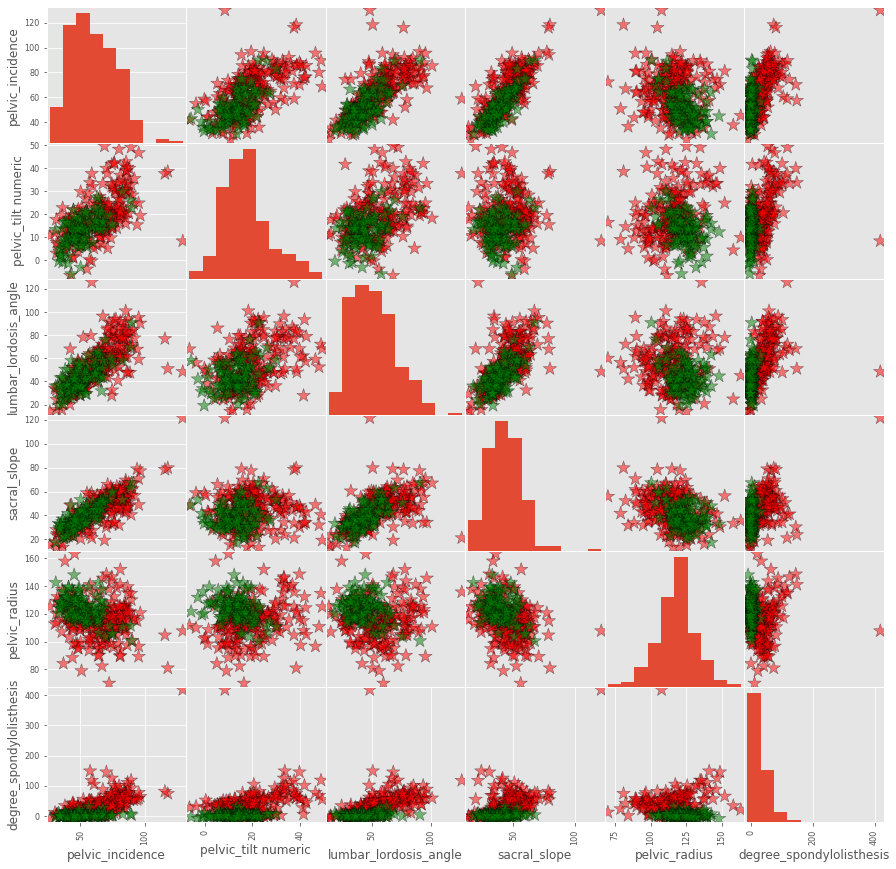

In [8]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

Abnormal    210
Normal      100
Name: class, dtype: int64

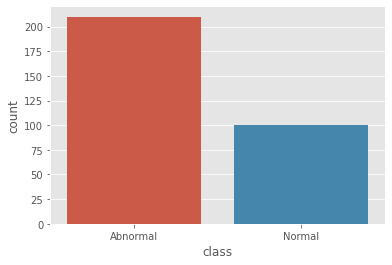

In [9]:
sns.countplot(x="class", data=data)
data.loc[:,'class'].value_counts()

### KNN
* KNN: Look at the K closest labeled data points
* Classification method.
* First we need to train our data. Train = fit
* fit(): fits the data, train the data.
* predict(): predicts the data
* If you do not understand what is KNN, look at youtube there are videos like 4-5 minutes. You can understand better with it.
* Lets learn how to implement it with sklearn
* x: features
* y: target variables(normal, abnormal)
* n_neighbors: K. In this example it is 3. it means that Look at the 3 closest labeled data points

In [11]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x,y)
prediction = knn.predict(x)
prediction[:3]

array(['Abnormal', 'Abnormal', 'Abnormal'], dtype=object)

In [12]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.8602150537634409


In [13]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

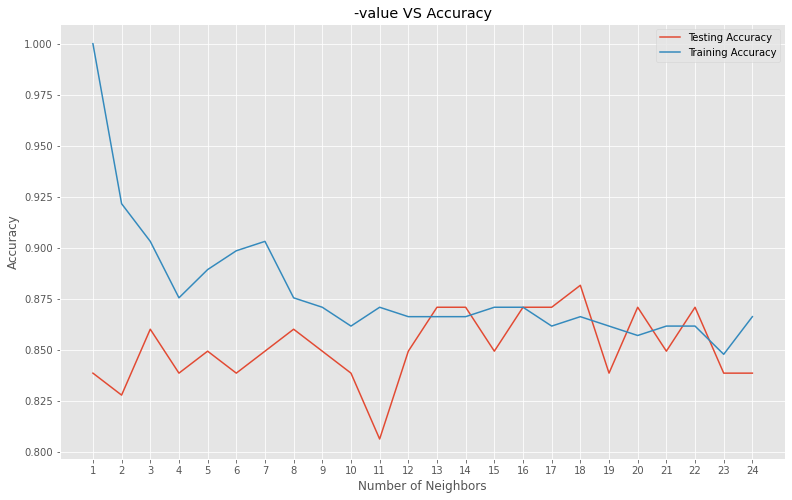

Best accuracy is 0.8817204301075269 with K = 18


In [14]:
# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

### Regression

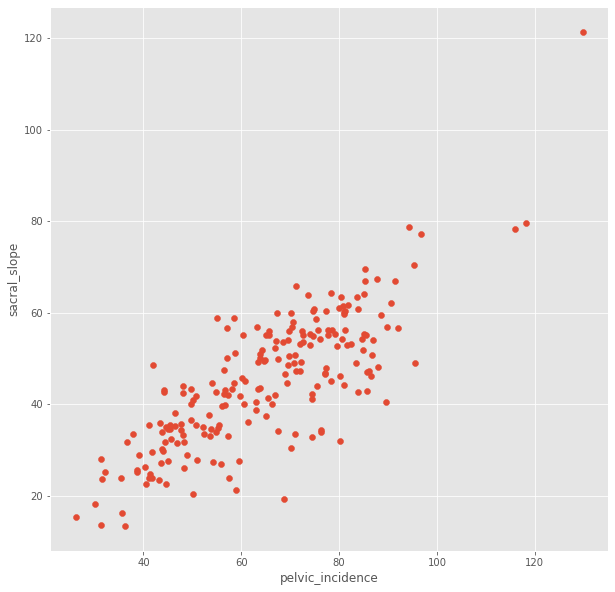

In [15]:
# create data1 that includes pelvic_incidence that is feature and sacral_slope that is target variable
data1 = data[data['class'] =='Abnormal']
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

R^2 score:  0.6458410481075871


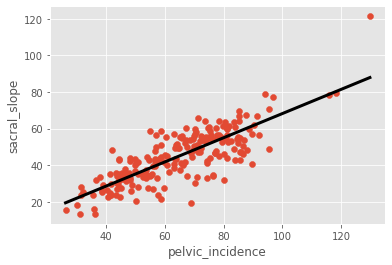

In [16]:
# LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
# Fit
reg.fit(x,y)
# Predict
predicted = reg.predict(predict_space)
# R^2 
print('R^2 score: ',reg.score(x, y))
# Plot regression line and scatter
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

## 交叉验证 Cross Validation (CV)

In [17]:
# CV
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg,x,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
CV scores average:  0.39314625028848676


#### Regularized Regression 正则化

In [18]:
# Ridge
from sklearn.linear_model import Ridge
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))

Ridge score:  0.5608287918841997


In [19]:
# Lasso
from sklearn.linear_model import Lasso
x = np.array(data1.loc[:,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','pelvic_radius']])
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.9640334804327547
Lasso coefficients:  [ 0.82498243 -0.7209057   0.         -0.        ]


**confusion matrix**
- tp = true positive(20), fp = false positive(7), fn = false negative(8), tn = true negative(58)
- tp = Prediction is positive(normal) and actual is positive(normal).
- fp = Prediction is positive(normal) and actual is negative(abnormal).
- fn = Prediction is negative(abnormal) and actual is positive(normal).
- tn = Prediction is negative(abnormal) and actual is negative(abnormal)
- precision = tp / (tp+fp)
- recall = tp / (tp+fn)
- f1 = 2 precision recall / ( precision + recall)

In [20]:
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[60  6]
 [ 8 19]]
Classification report: 
               precision    recall  f1-score   support

    Abnormal       0.88      0.91      0.90        66
      Normal       0.76      0.70      0.73        27

    accuracy                           0.85        93
   macro avg       0.82      0.81      0.81        93
weighted avg       0.85      0.85      0.85        93



### ROC Curve with Logistic Regression

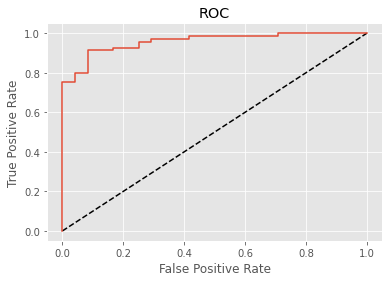

In [21]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# abnormal = 1 and normal = 0
data['class_binary'] = [1 if i == 'Abnormal' else 0 for i in data.loc[:,'class']]
x,y = data.loc[:,(data.columns != 'class') & (data.columns != 'class_binary')], data.loc[:,'class_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [22]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(x,y)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 4}
Best score: 0.7559434901667911


## 数据预处理

In [27]:
df = pd.get_dummies(data)
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_binary,class_Abnormal,class_Normal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1,1,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1,1,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1,1,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1,1,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1,1,0


In [28]:
df.drop("class_Normal",axis = 1, inplace = True) 


In [29]:
df.drop("class_binary",axis = 1, inplace = True) 
df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,1
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1


In [30]:
# SVM, pre-process and pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 1)
cv = GridSearchCV(pipeline,param_grid=parameters,cv=3)
cv.fit(x_train,y_train)

y_pred = cv.predict(x_test)

print("Accuracy: {}".format(cv.score(x_test, y_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8548387096774194
Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


# 无监督学习


## K-Means

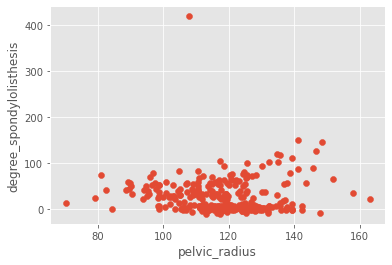

In [31]:
# As you can see there is no labels in data
data = pd.read_csv('column_2C_weka.csv')

plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'])
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')

plt.show()

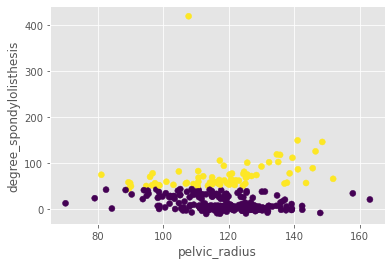

In [33]:
# KMeans Clustering
data2 = data.loc[:,['degree_spondylolisthesis','pelvic_radius']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'],c = labels)
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

In [34]:
# cross tabulation table
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0            138     100
1             72       0


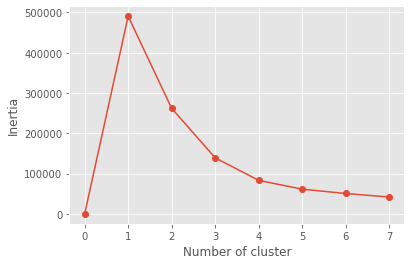

In [35]:
# inertia
inertia_list = np.empty(8)
for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

## 标准化


In [36]:
data = pd.read_csv('column_2C_weka.csv')
data3 = data.drop('class',axis = 1)

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scalar,kmeans)
pipe.fit(data3)
labels = pipe.predict(data3)
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0            116      10
1             94      90


### HIERARCHY 层次化

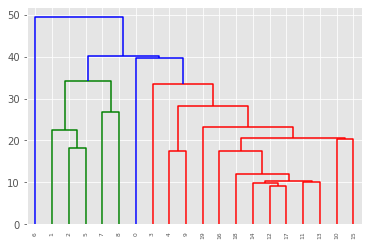

In [38]:
from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(data3.iloc[200:220,:],method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.show()

## T - Distributed Stochastic Neighbor Embedding (T - SNE)¶

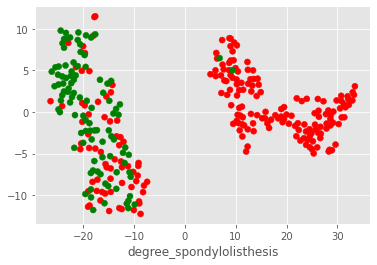

In [39]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(data2)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list )
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

## PCA

In [40]:
# PCA
from sklearn.decomposition import PCA
model = PCA()
model.fit(data3)
transformed = model.transform(data3)
print('Principle components: ',model.components_)

Principle components:  [[ 3.23645647e-01  1.13192291e-01  3.03674740e-01  2.10453357e-01
  -2.99598300e-02  8.63153779e-01]
 [-4.76634849e-01 -9.85632787e-02 -5.32783979e-01 -3.78071570e-01
   3.21809199e-01  4.82438036e-01]
 [-1.54481282e-03 -2.64657410e-01 -4.96541893e-01  2.63112598e-01
  -7.74612852e-01  1.18940778e-01]
 [ 3.73677251e-01  7.54113757e-01 -3.39411757e-01 -3.80436506e-01
  -1.75106042e-01 -3.29143086e-02]
 [-4.41703869e-01  7.35414748e-02  5.12024113e-01 -5.15245344e-01
  -5.14639730e-01  8.35992525e-02]
 [ 5.77350269e-01 -5.77350269e-01 -1.08930072e-11 -5.77350269e-01
  -3.59059872e-12  3.06729795e-12]]


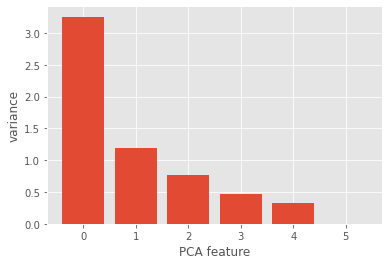

In [41]:
# PCA variance
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(data3)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

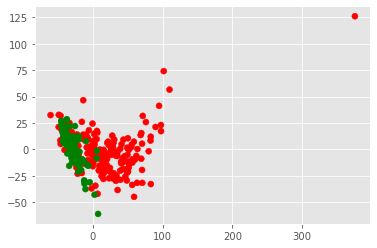

In [42]:
# apply PCA
pca = PCA(n_components = 2)
pca.fit(data3)
transformed = pca.transform(data3)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list)
plt.show()